# Network Graphics for Tomato NRC Network

Author: Andres Posbeyikian
Date of Creation: 12/Dec/2023
Description: Jupyter Notebook to produce a network graphics reflecting NRC Sensor-Helper Networks in tomato, and expression data from root and leaf organs.

## 1. Set up

### 1.0 Installing packages
Install the required packages if needed

In [ ]:
pip install pandas openpyxl networkx
pip install matplotlib
pip install pandas
pip install pygraphviz

### 1.1 Importing libraries

In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import FixedLocator, StrMethodFormatter

### 1.2 Importing datasets

In [7]:
# Data needed to draw edges 
#edge_df = pd.read_excel("network_analysis_dataframe1.xlsx",sheet_name='Nodes')
#edge_df_1.set_index('Unnamed: 0', inplace=True) 
#edge_df_1.rename_axis('Sensor', inplace=True)

# Transcriptomic data necessary to shade nodes (sensors and helpers).
expression_df = pd.read_excel("/Path_To_Data/Transcript_Expression.xlsx")

In [8]:
expression_df

,Receptor,Type,ProteinID,L1,L2,L3,R1,R2,R3
0,"Rx,Rx2,Gpa2",Sensor,MSTRG.20234|Solyc12g006040.2,120.979958,61.756801,70.607966,515.040560,427.093184,378.941423
1,Rx4,Sensor,MSTRG.19900|Solyc11g069020.2,333.512316,283.787204,334.883495,670.165061,561.937101,585.329162
2,Bs2,Sensor,MSTRG.3074|Solyc02g027080.2,2638.670974,3008.438438,2828.353370,4227.823038,4654.476211,4556.883391
3,Rpa1,Sensor,MSTRG.1321|Solyc01g087200.3,1252.306051,1086.625614,1337.516608,299.363073,203.052902,133.080619
4,CNL-11990,Sensor,Solyc04g011990.2|Solyc04g011990.2,0.000000,5.881600,0.000000,238.129717,163.701564,216.537956
5,NtTPN1,Sensor,MSTRG.3664|Solyc02g070410.2,11.444050,0.000000,0.000000,317.052709,352.587985,320.295727
6,Prf,Sensor,MSTRG.9724|Solyc05g013280.3,7278.415847,7884.284900,7349.280546,3010.639997,3112.953146,2789.053985
7,R1,Sensor,Solyc05g007350.2|Solyc05g007350.2,53.950522,14.704000,12.104223,4.762594,11.018375,14.097523
8,"R8,Sw5-b",Sensor,MSTRG.17242|Solyc09g098130.2,4592.333808,2701.124834,2533.817284,1474.363135,2279.754158,804.686623
9,Hero-A,Sensor,MSTRG.7595|Hero_A,1046.313150,1032.220813,762.566030,4729.936556,4810.307508,4365.157076


### 2.0 Calculating Mean Expression Values

In [9]:
# Calculate the mean expression for each receptor in each organ.
expression_df['Leaf_Mean'] = expression_df[['L1','L2','L3']].mean(axis=1)
expression_df['Root_Mean'] = expression_df[['R1','R2','R3']].mean(axis=1)

# Take the logarithm and store it in the expression dataframe.
expression_df['Log_Leaf_Mean'] = np.log(expression_df['Leaf_Mean']+1)
expression_df['Log_Root_Mean'] = np.log(expression_df['Root_Mean']+1)

expression_df

,Receptor,Type,ProteinID,L1,L2,L3,R1,R2,R3,Leaf_Mean,Root_Mean,Log_Leaf_Mean,Log_Root_Mean
0,"Rx,Rx2,Gpa2",Sensor,MSTRG.20234|Solyc12g006040.2,120.979958,61.756801,70.607966,515.040560,427.093184,378.941423,84.448241,440.358389,4.447911,6.089857
1,Rx4,Sensor,MSTRG.19900|Solyc11g069020.2,333.512316,283.787204,334.883495,670.165061,561.937101,585.329162,317.394338,605.810442,5.763291,6.408216
2,Bs2,Sensor,MSTRG.3074|Solyc02g027080.2,2638.670974,3008.438438,2828.353370,4227.823038,4654.476211,4556.883391,2825.154261,4479.727547,7.946672,8.407541
3,Rpa1,Sensor,MSTRG.1321|Solyc01g087200.3,1252.306051,1086.625614,1337.516608,299.363073,203.052902,133.080619,1225.482758,211.832198,7.111906,5.360504
4,CNL-11990,Sensor,Solyc04g011990.2|Solyc04g011990.2,0.000000,5.881600,0.000000,238.129717,163.701564,216.537956,1.960533,206.123079,1.085369,5.333313
5,NtTPN1,Sensor,MSTRG.3664|Solyc02g070410.2,11.444050,0.000000,0.000000,317.052709,352.587985,320.295727,3.814683,329.978807,1.571670,5.802054
6,Prf,Sensor,MSTRG.9724|Solyc05g013280.3,7278.415847,7884.284900,7349.280546,3010.639997,3112.953146,2789.053985,7503.993764,2970.882376,8.923324,7.996951
7,R1,Sensor,Solyc05g007350.2|Solyc05g007350.2,53.950522,14.704000,12.104223,4.762594,11.018375,14.097523,26.919582,9.959497,3.329328,2.394206
8,"R8,Sw5-b",Sensor,MSTRG.17242|Solyc09g098130.2,4592.333808,2701.124834,2533.817284,1474.363135,2279.754158,804.686623,3275.758642,1519.601305,8.094610,7.326861
9,Hero-A,Sensor,MSTRG.7595|Hero_A,1046.313150,1032.220813,762.566030,4729.936556,4810.307508,4365.157076,947.033331,4635.133713,6.854390,8.441636


### 2.2 Graphing Networks

#### 2.2.1 Leaf Network A

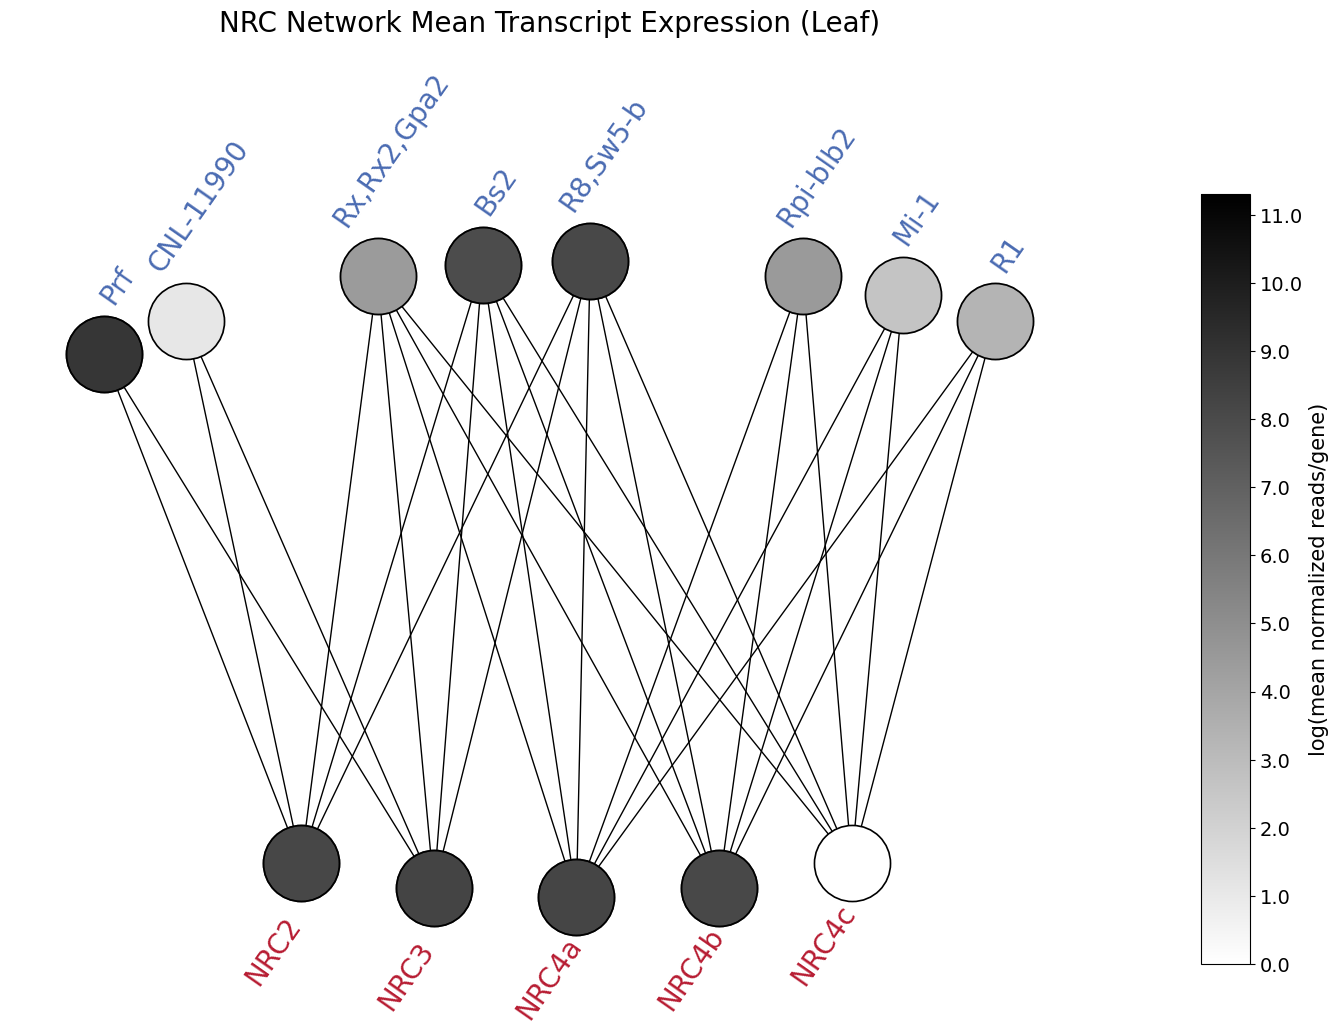

In [15]:
organ = 'Leaf'

# Create a figure and axis explicitly
fig = plt.figure(figsize=(16, 10))

# Create subplots with gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[22, 1])
ax = plt.subplot(gs[0])

# List the sensors and helpers
sensor_list = ["","R1",'Mi-1', 'Rpi-blb2',"", 'R8,Sw5-b', 'Bs2', 'Rx,Rx2,Gpa2',"", 'CNL-11990','Prf']
helper_list = ['NRC4c','NRC4b','NRC4a','NRC3','NRC2']

# Set the curvature of the arcs
radius = 5  # Radius of the circle for the upper arc
radius_lower = -4 # Radius of the circle for the lower arc
colormap = 'gray_r'

num_dots = len(sensor_list)  # Number of nodes to plot in the upper arc
num_dots_lower = len(helper_list) # Number of nodes to plot in the lower arc

# Calculate angles for the distribution of the nodes along the upper arc
angles = np.linspace((np.pi)/4, 3*(np.pi/4), num_dots, endpoint=True)

# Calculate the coordinates of the nodes on the upper arc
x_coords = radius * np.cos(angles)
y_coords = radius * np.sin(angles)

# Calculate angles for the distribution of the nodes along the lower arc
angles_lower = np.linspace(4 * np.pi / 3, 5 * np.pi / 3, num_dots_lower, endpoint=True)

# Calculate coordinates of the nodes on the lower arc
x_coords_second = radius_lower * np.cos(angles_lower) - 0.1
y_coords_second = -radius_lower * np.sin(angles_lower) - 1  # Adjust for vertical separation

# Create a networkx graph
G = nx.Graph()

# Define node positions and names for the upper arc as a dictionary
node_positions = {}
for i, node_name in enumerate(sensor_list):
    node_positions[node_name] = (x_coords[i], y_coords[i])

    
# Define node positions and names for the lower arc as a dictionary
node_positions_second = {}
for i, node_name in enumerate(helper_list):
    node_positions_second[node_name] = (x_coords_second[i], y_coords_second[i])

# Add nodes to the graph with specified positions
G.add_nodes_from(node_positions.keys())
G.add_nodes_from(node_positions_second.keys())

# Set node positions as attributes in the graph
nx.set_node_attributes(G, node_positions, 'pos')
nx.set_node_attributes(G, node_positions_second, 'pos')

# Define the edges between nodes in the upper and lower arcs
edges_between_arcs = [
    ('Prf', 'NRC2'),
    ('Prf', 'NRC3'),
    
    ('CNL-11990', 'NRC2'),
    ('CNL-11990', 'NRC3'),
    
    ('Rx,Rx2,Gpa2', 'NRC2'),
    ('Rx,Rx2,Gpa2', 'NRC3'),
    ('Rx,Rx2,Gpa2', 'NRC4a'),
    ('Rx,Rx2,Gpa2', 'NRC4b'),
    ('Rx,Rx2,Gpa2', 'NRC4c'),
    
    ('Bs2', 'NRC2'),
    ('Bs2', 'NRC3'),
    ('Bs2', 'NRC4a'),
    ('Bs2', 'NRC4b'),
    ('Bs2', 'NRC4c'),
    
    ('R8,Sw5-b', 'NRC2'),
    ('R8,Sw5-b', 'NRC3'),
    ('R8,Sw5-b', 'NRC4a'),
    ('R8,Sw5-b', 'NRC4b'),
    ('R8,Sw5-b', 'NRC4c'),
    
    ('Rpi-blb2', 'NRC4a'),
    ('Rpi-blb2', 'NRC4b'),
    ('Rpi-blb2', 'NRC4c'),
    
    ('Mi-1', 'NRC4a'),
    ('Mi-1', 'NRC4b'),
    ('Mi-1', 'NRC4c'),
    
    ('R1', 'NRC4a'),
    ('R1', 'NRC4b'),
    ('R1', 'NRC4c')]

# Add edges to the graph
G.add_edges_from(edges_between_arcs)

# Set the node colors based on the expression data in the expression_df dataframe
node_colors = expression_df[expression_df['Receptor'].isin(sensor_list+helper_list)].set_index("Receptor")["Log_"+organ+"_Mean"].to_dict()

# Because the color scale will be shared with networks from all organs, we need to set normalize taking into consideration the lowest and highest expression values across organs
all_node_colors = expression_df["Log_Leaf_Mean"].to_list() + expression_df["Log_Root_Mean"].to_list()
min_expression_value = min(all_node_colors)
max_expression_value = max(all_node_colors)

# We normalize values and create a normalized dictionary. This is necessary because we will pass it an alpha value, which must be in the range [0-1]

normalized_colors_dict = {}
for key, value in node_colors.items():
    normalized_value = (value - min_expression_value) / (max_expression_value - min_expression_value)
    normalized_colors_dict[key] = normalized_value

# Set node colors as attributes in the graph
nx.set_node_attributes(G, node_colors, 'node_color')

for node in (node_colors.keys()):
    nx.draw_networkx_nodes(
        G,
        pos={**node_positions, **node_positions_second},
        nodelist=[node],
        node_size=3000,
        node_color='white',  # You can change this color as needed
        edgecolors='black',
        linewidths=1.2,
        ax=ax)
    
# Draw nodes with varying opacities (using normalized expression values as alpha values)
for node in (node_colors.keys()):
    nx.draw_networkx_nodes(
        G,
        pos={**node_positions, **node_positions_second},
        nodelist=[node],
        node_size=3000,
        node_color='black',  # You can change this color as needed
        edgecolors='black',
        linewidths=1.2,
        alpha=normalized_colors_dict[node],
        ax=ax)


# Draw node labels
nx.draw(G, pos={**node_positions, **node_positions_second}, ax=ax, node_size=0, node_color='white',edgecolors='black')
#nx.draw_networkx_labels(G, {**node_positions, **node_positions_second}, font_size=0, font_color='black', verticalalignment='center')

# Draw node labels above nodes with a larger font size
for node, pos in {**node_positions}.items():
    x, y = pos
    plt.text(x+ 0.1, y + 0.8, node, fontsize=20, ha='center', rotation=55,color='#4a6bb2')
    
    
for node, pos in {**node_positions_second}.items():
    x, y = pos
    plt.text(x- 0.2, y - 1.9, node, fontsize=20, ha='center', rotation=55,color='#b71c32')
    
    
# Customize the plot
plt.title("NRC Network Mean Transcript Expression ("+organ+")",fontsize=20, y=1.2)
plt.axis('off')

# Create a color scale legend in the right subplot
cbar_ax = plt.subplot(gs[1])
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min_expression_value, vmax=max_expression_value))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.set_ticks(np.arange(0, max_expression_value, 1))
cbar.ax.tick_params(labelsize=14)  # Adjust the size as needed

# Format the ticks with one decimal place
cbar.ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.1f}"))
cbar.set_label("log(mean normalized reads/gene)",fontsize=15)

# Save the figure
plt.savefig("NRC_Network_Mean_Transcript_Expression_"+organ+"_A.svg")

# Display the plot
plt.show()

#### 2.2.2 Root Network A

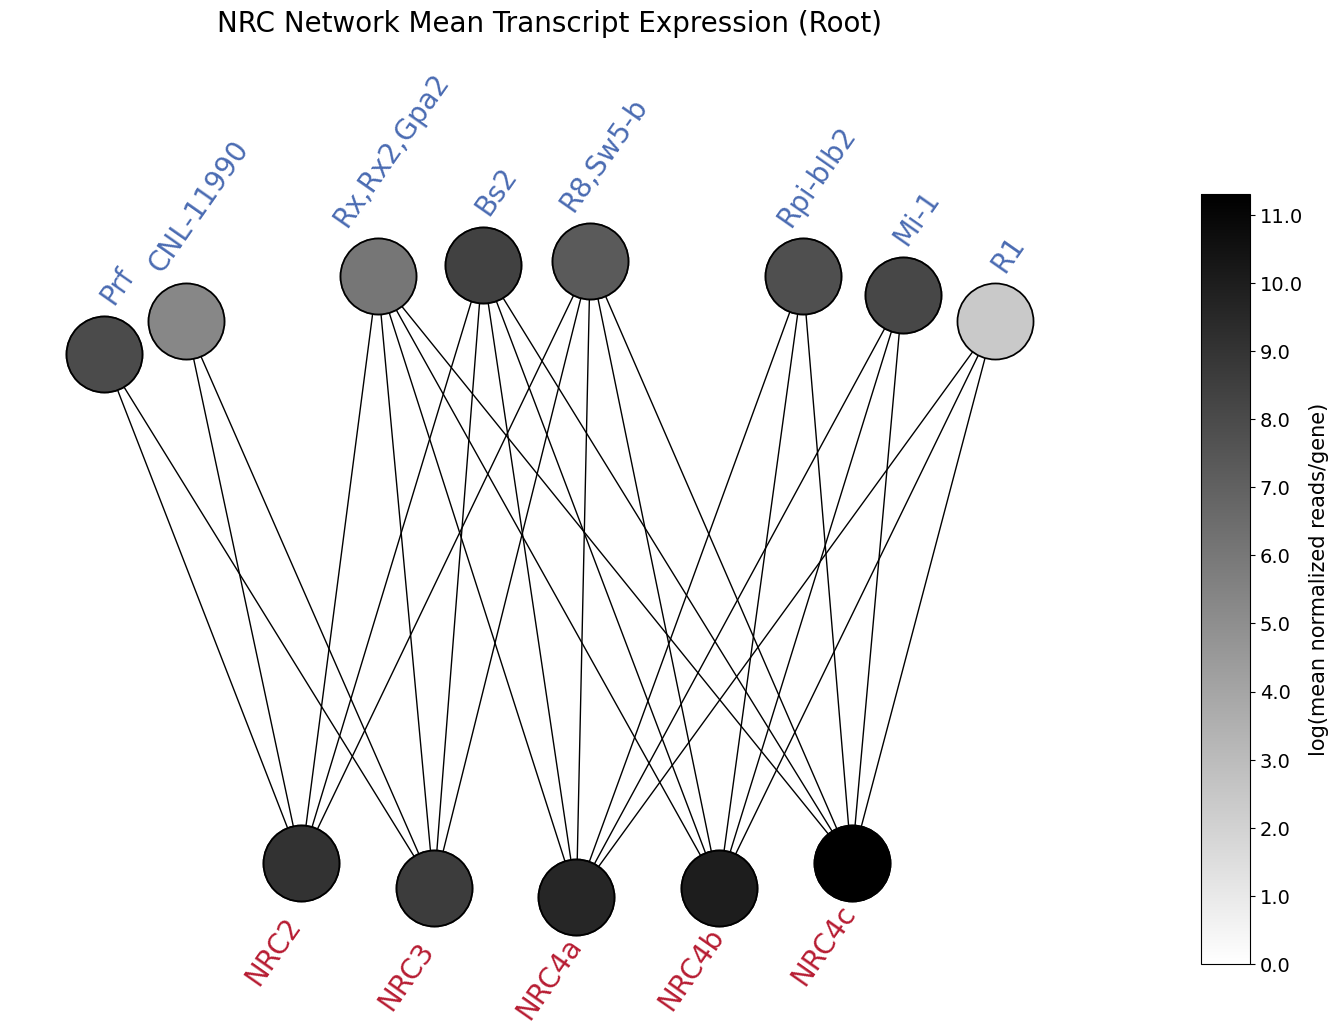

In [16]:
organ = 'Root'

# Create a figure and axis explicitly
fig = plt.figure(figsize=(16, 10))

# Create subplots with gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[22, 1])
ax = plt.subplot(gs[0])

# List the sensors and helpers
sensor_list = ["","R1",'Mi-1', 'Rpi-blb2',"", 'R8,Sw5-b', 'Bs2', 'Rx,Rx2,Gpa2',"", 'CNL-11990','Prf']
helper_list = ['NRC4c','NRC4b','NRC4a','NRC3','NRC2']

# Set the curvature of the arcs
radius = 5  # Radius of the circle for the upper arc
radius_lower = -4 # Radius of the circle for the lower arc
colormap = 'gray_r'

num_dots = len(sensor_list)  # Number of nodes to plot in the upper arc
num_dots_lower = len(helper_list) # Number of nodes to plot in the lower arc

# Calculate angles for the distribution of the nodes along the upper arc
angles = np.linspace((np.pi)/4, 3*(np.pi/4), num_dots, endpoint=True)

# Calculate the coordinates of the nodes on the upper arc
x_coords = radius * np.cos(angles)
y_coords = radius * np.sin(angles)

# Calculate angles for the distribution of the nodes along the lower arc
angles_lower = np.linspace(4 * np.pi / 3, 5 * np.pi / 3, num_dots_lower, endpoint=True)

# Calculate coordinates of the nodes on the lower arc
x_coords_second = radius_lower * np.cos(angles_lower) - 0.1
y_coords_second = -radius_lower * np.sin(angles_lower) - 1  # Adjust for vertical separation

# Create a networkx graph
G = nx.Graph()

# Define node positions and names for the upper arc as a dictionary
node_positions = {}
for i, node_name in enumerate(sensor_list):
    node_positions[node_name] = (x_coords[i], y_coords[i])

    
# Define node positions and names for the lower arc as a dictionary
node_positions_second = {}
for i, node_name in enumerate(helper_list):
    node_positions_second[node_name] = (x_coords_second[i], y_coords_second[i])

# Add nodes to the graph with specified positions
G.add_nodes_from(node_positions.keys())
G.add_nodes_from(node_positions_second.keys())

# Set node positions as attributes in the graph
nx.set_node_attributes(G, node_positions, 'pos')
nx.set_node_attributes(G, node_positions_second, 'pos')

# Define the edges between nodes in the upper and lower arcs
edges_between_arcs = [
    ('Prf', 'NRC2'),
    ('Prf', 'NRC3'),
    
    ('CNL-11990', 'NRC2'),
    ('CNL-11990', 'NRC3'),
    
    ('Rx,Rx2,Gpa2', 'NRC2'),
    ('Rx,Rx2,Gpa2', 'NRC3'),
    ('Rx,Rx2,Gpa2', 'NRC4a'),
    ('Rx,Rx2,Gpa2', 'NRC4b'),
    ('Rx,Rx2,Gpa2', 'NRC4c'),
    
    ('Bs2', 'NRC2'),
    ('Bs2', 'NRC3'),
    ('Bs2', 'NRC4a'),
    ('Bs2', 'NRC4b'),
    ('Bs2', 'NRC4c'),
    
    ('R8,Sw5-b', 'NRC2'),
    ('R8,Sw5-b', 'NRC3'),
    ('R8,Sw5-b', 'NRC4a'),
    ('R8,Sw5-b', 'NRC4b'),
    ('R8,Sw5-b', 'NRC4c'),
    
    ('Rpi-blb2', 'NRC4a'),
    ('Rpi-blb2', 'NRC4b'),
    ('Rpi-blb2', 'NRC4c'),
    
    ('Mi-1', 'NRC4a'),
    ('Mi-1', 'NRC4b'),
    ('Mi-1', 'NRC4c'),
    
    ('R1', 'NRC4a'),
    ('R1', 'NRC4b'),
    ('R1', 'NRC4c')]

# Add edges to the graph
G.add_edges_from(edges_between_arcs)

# Set the node colors based on the expression data in the expression_df dataframe
node_colors = expression_df[expression_df['Receptor'].isin(sensor_list+helper_list)].set_index("Receptor")["Log_"+organ+"_Mean"].to_dict()

# Because the color scale will be shared with networks from all organs, we need to set normalize taking into consideration the lowest and highest expression values across organs
all_node_colors = expression_df["Log_Leaf_Mean"].to_list() + expression_df["Log_Root_Mean"].to_list()
min_expression_value = min(all_node_colors)
max_expression_value = max(all_node_colors)

# We normalize values and create a normalized dictionary. This is necessary because we will pass it an alpha value, which must be in the range [0-1]

normalized_colors_dict = {}
for key, value in node_colors.items():
    normalized_value = (value - min_expression_value) / (max_expression_value - min_expression_value)
    normalized_colors_dict[key] = normalized_value

# Set node colors as attributes in the graph
nx.set_node_attributes(G, node_colors, 'node_color')

for node in (node_colors.keys()):
    nx.draw_networkx_nodes(
        G,
        pos={**node_positions, **node_positions_second},
        nodelist=[node],
        node_size=3000,
        node_color='white',  # You can change this color as needed
        edgecolors='black',
        linewidths=1.2,
        ax=ax)
    
# Draw nodes with varying opacities (using normalized expression values as alpha values)
for node in (node_colors.keys()):
    nx.draw_networkx_nodes(
        G,
        pos={**node_positions, **node_positions_second},
        nodelist=[node],
        node_size=3000,
        node_color='black',  # You can change this color as needed
        edgecolors='black',
        linewidths=1.2,
        alpha=normalized_colors_dict[node],
        ax=ax)


# Draw node labels
nx.draw(G, pos={**node_positions, **node_positions_second}, ax=ax, node_size=0, node_color='white',edgecolors='black')
#nx.draw_networkx_labels(G, {**node_positions, **node_positions_second}, font_size=0, font_color='black', verticalalignment='center')

# Draw node labels above nodes with a larger font size
for node, pos in {**node_positions}.items():
    x, y = pos
    plt.text(x+ 0.1, y + 0.8, node, fontsize=20, ha='center', rotation=55,color='#4a6bb2')
    
    
for node, pos in {**node_positions_second}.items():
    x, y = pos
    plt.text(x- 0.2, y - 1.9, node, fontsize=20, ha='center', rotation=55,color='#b71c32')
    
    
# Customize the plot
plt.title("NRC Network Mean Transcript Expression ("+organ+")",fontsize=20, y=1.2)
plt.axis('off')

# Create a color scale legend in the right subplot
cbar_ax = plt.subplot(gs[1])
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min_expression_value, vmax=max_expression_value))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.set_ticks(np.arange(0, max_expression_value, 1))
cbar.ax.tick_params(labelsize=14)  # Adjust the size as needed

# Format the ticks with one decimal place
cbar.ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.1f}"))
cbar.set_label("log(mean normalized reads/gene)",fontsize=15)

# Save the figure
plt.savefig("NRC_Network_Mean_Transcript_Expression_"+organ+"_A.svg")

# Display the plot
plt.show()

#### 2.2.3 Leaf Network B

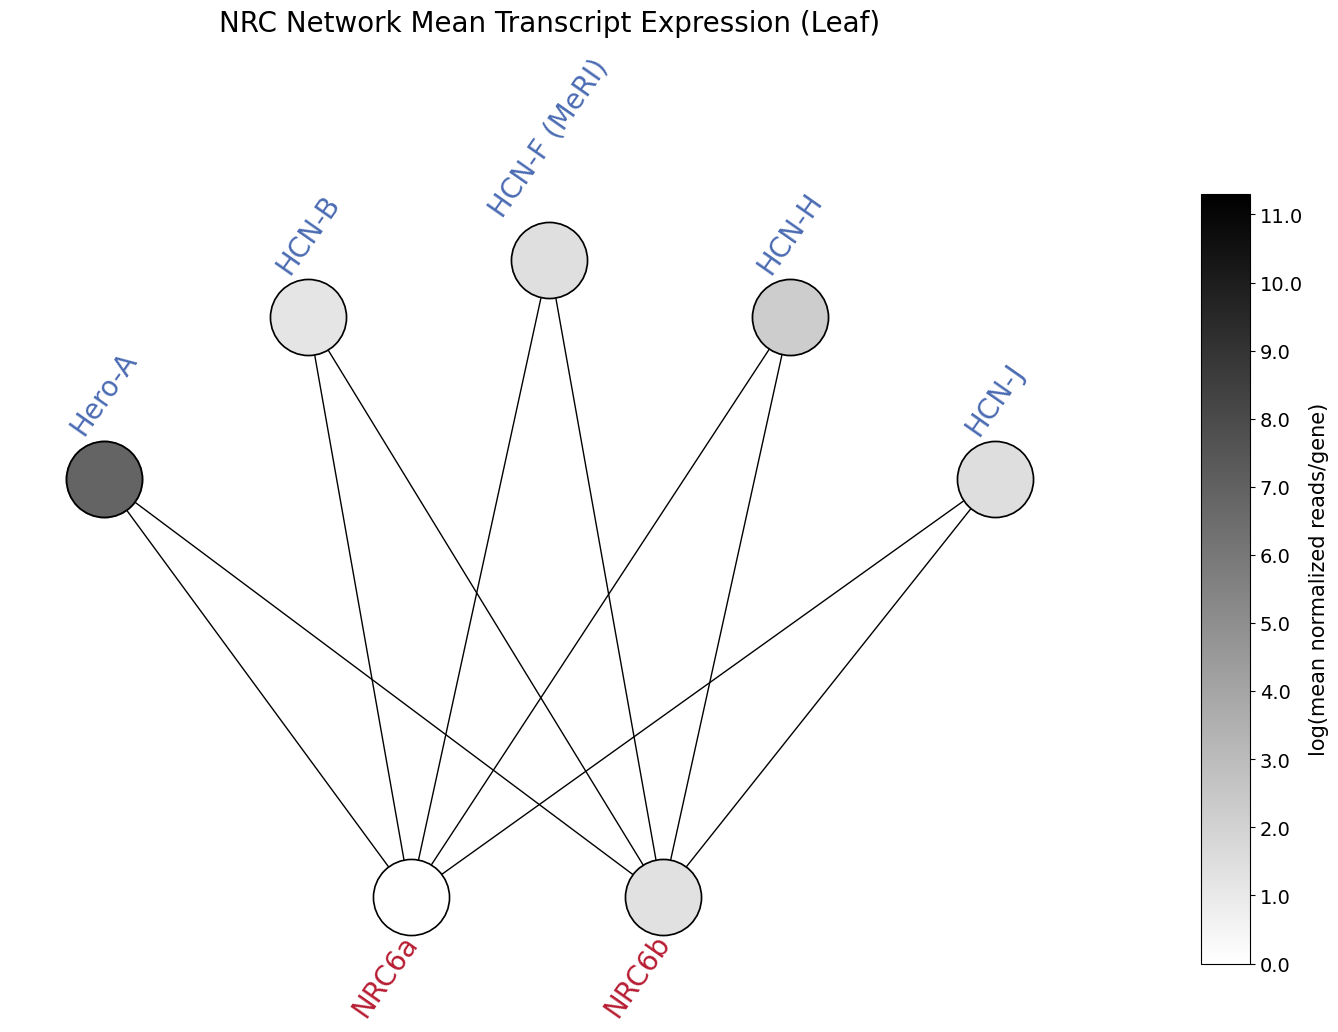

In [17]:
organ = 'Leaf'

# Create a figure and axis explicitly
fig = plt.figure(figsize=(16, 10))

# Create subplots with gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[22, 1])
ax = plt.subplot(gs[0])

# List the sensors and helpers
sensor_list = ['HCN-J','HCN-H','HCN-F (MeRI)','HCN-B','Hero-A']
helper_list = ['NRC6a','NRC6b']

# Set the curvature of the arcs
radius = 5  # Radius of the circle for the upper arc
radius_lower = 2 # Radius of the circle for the lower arc
colormap = 'gray_r'

num_dots = len(sensor_list)  # Number of nodes to plot in the upper arc
num_dots_lower = len(helper_list) # Number of nodes to plot in the lower arc

# Calculate angles for the distribution of the nodes along the upper arc
angles = np.linspace((np.pi)/4, 3*(np.pi/4), num_dots, endpoint=True)

# Calculate the coordinates of the nodes on the upper arc
x_coords = radius * np.cos(angles)
y_coords = radius * np.sin(angles)

# Calculate angles for the distribution of the nodes along the lower arc
angles_lower = np.linspace(4 * np.pi / 3, 5 * np.pi / 3, num_dots_lower, endpoint=True)

# Calculate coordinates of the nodes on the lower arc
x_coords_second = radius_lower * np.cos(angles_lower) - 0.1
y_coords_second = -radius_lower * np.sin(angles_lower) - 1  # Adjust for vertical separation

# Create a networkx graph
G = nx.Graph()

# Define node positions and names for the upper arc as a dictionary
node_positions = {}
for i, node_name in enumerate(sensor_list):
    node_positions[node_name] = (x_coords[i], y_coords[i])

    
# Define node positions and names for the lower arc as a dictionary
node_positions_second = {}
for i, node_name in enumerate(helper_list):
    node_positions_second[node_name] = (x_coords_second[i], y_coords_second[i])

# Add nodes to the graph with specified positions
G.add_nodes_from(node_positions.keys())
G.add_nodes_from(node_positions_second.keys())

# Set node positions as attributes in the graph
nx.set_node_attributes(G, node_positions, 'pos')
nx.set_node_attributes(G, node_positions_second, 'pos')

# Define the edges between nodes in the upper and lower arcs
edges_between_arcs = [
    ('Hero-A', 'NRC6a'),
    ('Hero-A', 'NRC6b'),
    
    ('HCN-B', 'NRC6a'),
    ('HCN-B', 'NRC6b'),
    
    ('HCN-F (MeRI)', 'NRC6a'),
    ('HCN-F (MeRI)', 'NRC6b'),
    
    ('HCN-H', 'NRC6a'),
    ('HCN-H', 'NRC6b'),
    
    ('HCN-J', 'NRC6a'),
    ('HCN-J', 'NRC6b')]

# Add edges to the graph
G.add_edges_from(edges_between_arcs)

# Set the node colors based on the expression data in the expression_df dataframe
node_colors = expression_df[expression_df['Receptor'].isin(sensor_list+helper_list)].set_index("Receptor")["Log_"+organ+"_Mean"].to_dict()

# Because the color scale will be shared with networks from all organs, we need to set normalize taking into consideration the lowest and highest expression values across organs
all_node_colors = expression_df["Log_Leaf_Mean"].to_list() + expression_df["Log_Root_Mean"].to_list()
min_expression_value = min(all_node_colors)
max_expression_value = max(all_node_colors)

# We normalize values and create a normalized dictionary. This is necessary because we will pass it an alpha value, which must be in the range [0-1]

normalized_colors_dict = {}
for key, value in node_colors.items():
    normalized_value = (value - min_expression_value) / (max_expression_value - min_expression_value)
    normalized_colors_dict[key] = normalized_value

# Set node colors as attributes in the graph
nx.set_node_attributes(G, node_colors, 'node_color')

for node in (node_colors.keys()):
    nx.draw_networkx_nodes(
        G,
        pos={**node_positions, **node_positions_second},
        nodelist=[node],
        node_size=3000,
        node_color='white',  # You can change this color as needed
        edgecolors='black',
        linewidths=1.2,
        ax=ax)
    
# Draw nodes with varying opacities (using normalized expression values as alpha values)
for node in (node_colors.keys()):
    nx.draw_networkx_nodes(
        G,
        pos={**node_positions, **node_positions_second},
        nodelist=[node],
        node_size=3000,
        node_color='black',  # You can change this color as needed
        edgecolors='black',
        linewidths=1.2,
        alpha=normalized_colors_dict[node],
        ax=ax)


# Draw node labels
nx.draw(G, pos={**node_positions, **node_positions_second}, ax=ax, node_size=0, node_color='white',edgecolors='black')

# Draw node labels above nodes with a larger font size
for node, pos in {**node_positions}.items():
    x, y = pos
    plt.text(x, y + 0.3, node, fontsize=20, ha='center', rotation=55,color='#4a6bb2')
    
    
for node, pos in {**node_positions_second}.items():
    x, y = pos
    plt.text(x- 0.2, y - 0.8, node, fontsize=20, ha='center', rotation=55,color='#b71c32')
    
    
# Customize the plot
plt.title("NRC Network Mean Transcript Expression ("+organ+")",fontsize=20, y=1.2)
plt.axis('off')

# Create a color scale legend in the right subplot
cbar_ax = plt.subplot(gs[1])
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min_expression_value, vmax=max_expression_value))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.set_ticks(np.arange(0, max_expression_value, 1))
cbar.ax.tick_params(labelsize=14)  # Adjust the size as needed

# Format the ticks with one decimal place
cbar.ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.1f}"))
cbar.set_label("log(mean normalized reads/gene)",fontsize=15)

# Save the figure
plt.savefig("NRC_Network_Mean_Transcript_Expression_"+organ+"_B.svg")

# Display the plot
plt.show()

#### 2.2.4 Root Network B

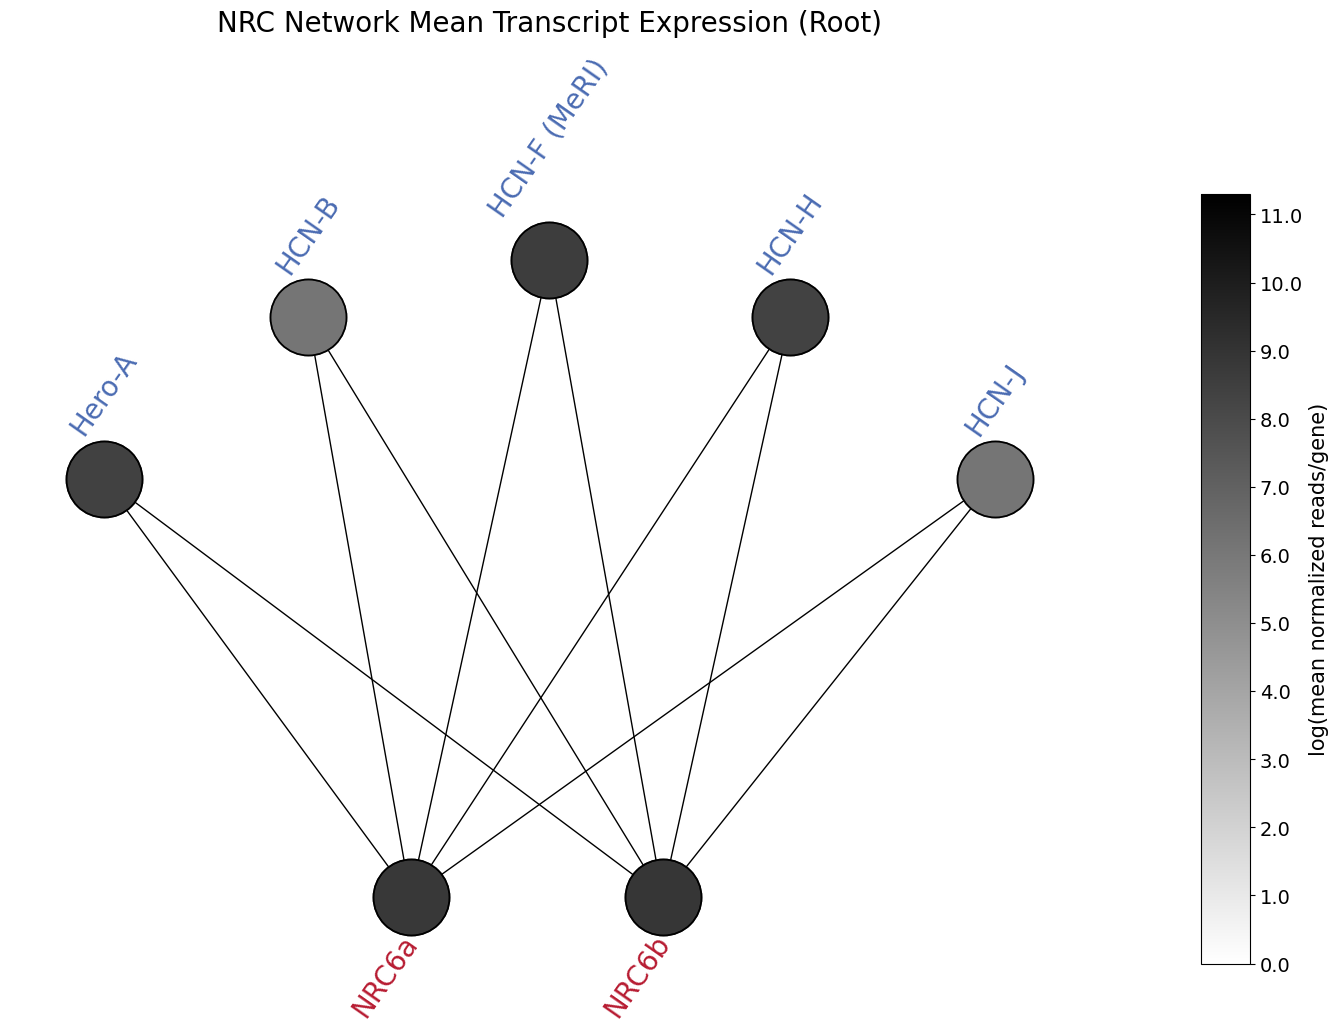

In [18]:
organ = 'Root'

# Create a figure and axis explicitly
fig = plt.figure(figsize=(16, 10))

# Create subplots with gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[22, 1])
ax = plt.subplot(gs[0])

# List the sensors and helpers
sensor_list = ['HCN-J','HCN-H','HCN-F (MeRI)','HCN-B','Hero-A']
helper_list = ['NRC6a','NRC6b']

# Set the curvature of the arcs
radius = 5  # Radius of the circle for the upper arc
radius_lower = 2 # Radius of the circle for the lower arc
colormap = 'gray_r'

num_dots = len(sensor_list)  # Number of nodes to plot in the upper arc
num_dots_lower = len(helper_list) # Number of nodes to plot in the lower arc

# Calculate angles for the distribution of the nodes along the upper arc
angles = np.linspace((np.pi)/4, 3*(np.pi/4), num_dots, endpoint=True)

# Calculate the coordinates of the nodes on the upper arc
x_coords = radius * np.cos(angles)
y_coords = radius * np.sin(angles)

# Calculate angles for the distribution of the nodes along the lower arc
angles_lower = np.linspace(4 * np.pi / 3, 5 * np.pi / 3, num_dots_lower, endpoint=True)

# Calculate coordinates of the nodes on the lower arc
x_coords_second = radius_lower * np.cos(angles_lower) - 0.1
y_coords_second = -radius_lower * np.sin(angles_lower) - 1  # Adjust for vertical separation

# Create a networkx graph
G = nx.Graph()

# Define node positions and names for the upper arc as a dictionary
node_positions = {}
for i, node_name in enumerate(sensor_list):
    node_positions[node_name] = (x_coords[i], y_coords[i])

    
# Define node positions and names for the lower arc as a dictionary
node_positions_second = {}
for i, node_name in enumerate(helper_list):
    node_positions_second[node_name] = (x_coords_second[i], y_coords_second[i])

# Add nodes to the graph with specified positions
G.add_nodes_from(node_positions.keys())
G.add_nodes_from(node_positions_second.keys())

# Set node positions as attributes in the graph
nx.set_node_attributes(G, node_positions, 'pos')
nx.set_node_attributes(G, node_positions_second, 'pos')

# Define the edges between nodes in the upper and lower arcs
edges_between_arcs = [
    ('Hero-A', 'NRC6a'),
    ('Hero-A', 'NRC6b'),
    
    ('HCN-B', 'NRC6a'),
    ('HCN-B', 'NRC6b'),
    
    ('HCN-F (MeRI)', 'NRC6a'),
    ('HCN-F (MeRI)', 'NRC6b'),
    
    ('HCN-H', 'NRC6a'),
    ('HCN-H', 'NRC6b'),
    
    ('HCN-J', 'NRC6a'),
    ('HCN-J', 'NRC6b')]

# Add edges to the graph
G.add_edges_from(edges_between_arcs)

# Set the node colors based on the expression data in the expression_df dataframe
node_colors = expression_df[expression_df['Receptor'].isin(sensor_list+helper_list)].set_index("Receptor")["Log_"+organ+"_Mean"].to_dict()

# Because the color scale will be shared with networks from all organs, we need to set normalize taking into consideration the lowest and highest expression values across organs
all_node_colors = expression_df["Log_Leaf_Mean"].to_list() + expression_df["Log_Root_Mean"].to_list()
min_expression_value = min(all_node_colors)
max_expression_value = max(all_node_colors)

# We normalize values and create a normalized dictionary. This is necessary because we will pass it an alpha value, which must be in the range [0-1]

normalized_colors_dict = {}
for key, value in node_colors.items():
    normalized_value = (value - min_expression_value) / (max_expression_value - min_expression_value)
    normalized_colors_dict[key] = normalized_value

# Set node colors as attributes in the graph
nx.set_node_attributes(G, node_colors, 'node_color')

for node in (node_colors.keys()):
    nx.draw_networkx_nodes(
        G,
        pos={**node_positions, **node_positions_second},
        nodelist=[node],
        node_size=3000,
        node_color='white',  # You can change this color as needed
        edgecolors='black',
        linewidths=1.2,
        ax=ax)
    
# Draw nodes with varying opacities (using normalized expression values as alpha values)
for node in (node_colors.keys()):
    nx.draw_networkx_nodes(
        G,
        pos={**node_positions, **node_positions_second},
        nodelist=[node],
        node_size=3000,
        node_color='black',  # You can change this color as needed
        edgecolors='black',
        linewidths=1.2,
        alpha=normalized_colors_dict[node],
        ax=ax)


# Draw node labels
nx.draw(G, pos={**node_positions, **node_positions_second}, ax=ax, node_size=0, node_color='white',edgecolors='black')

# Draw node labels above nodes with a larger font size
for node, pos in {**node_positions}.items():
    x, y = pos
    plt.text(x, y + 0.3, node, fontsize=20, ha='center', rotation=55,color='#4a6bb2')
    
    
for node, pos in {**node_positions_second}.items():
    x, y = pos
    plt.text(x- 0.2, y - 0.8, node, fontsize=20, ha='center', rotation=55,color='#b71c32')
    
    
# Customize the plot
plt.title("NRC Network Mean Transcript Expression ("+organ+")",fontsize=20, y=1.2)
plt.axis('off')

# Create a color scale legend in the right subplot
cbar_ax = plt.subplot(gs[1])
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min_expression_value, vmax=max_expression_value))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar.set_ticks(np.arange(0, max_expression_value, 1))
cbar.ax.tick_params(labelsize=14)  # Adjust the size as needed

# Format the ticks with one decimal place
cbar.ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.1f}"))
cbar.set_label("log(mean normalized reads/gene)",fontsize=15)

# Save the figure
plt.savefig("NRC_Network_Mean_Transcript_Expression_"+organ+"_B.svg")

# Display the plot
plt.show()